In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
yahoo = pd.read_csv('yahoo_stock.csv', index_col=0, parse_dates=[0])

In [3]:
yahoo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [4]:
yahoo.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117
2020-11-20,3581.229980,3556.850098,3579.310059,3557.540039,2.236662e+09,3557.540039


In [5]:
yahoo.shape

(1825, 6)

In [6]:
yahoo.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [7]:
yahoo.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


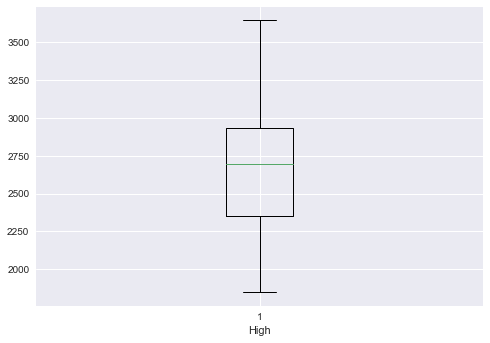

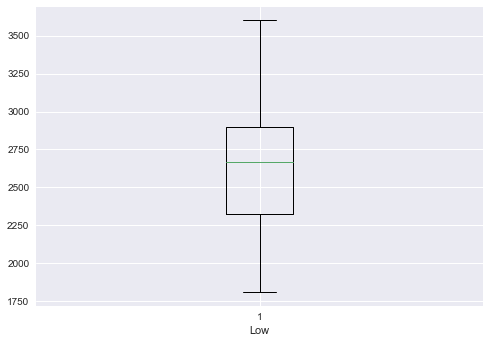

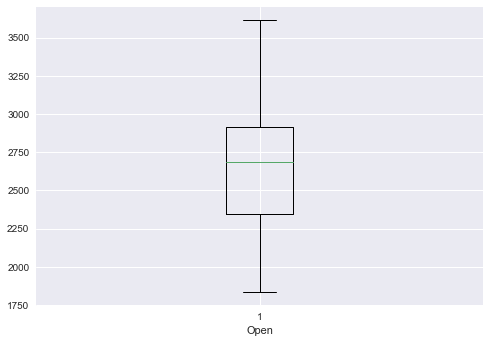

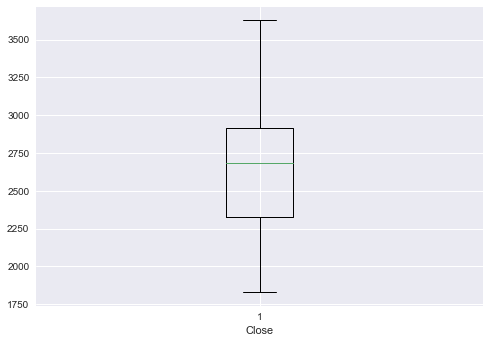

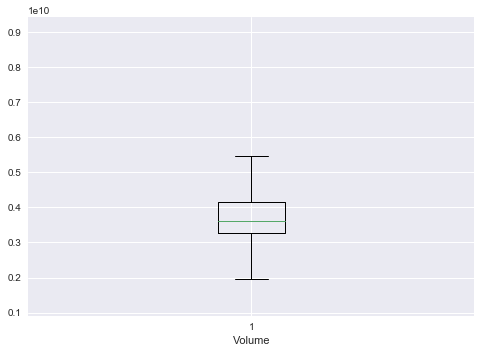

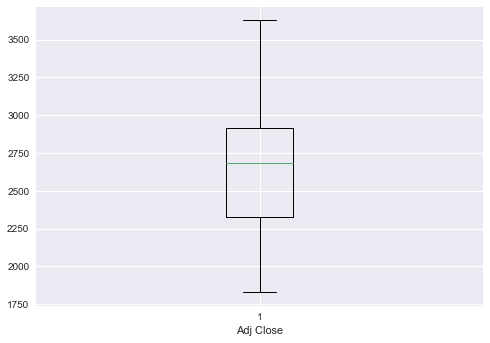

In [8]:
plt.style.use('seaborn')
for column in yahoo.columns:
    plt.boxplot(yahoo[column])
    plt.xlabel(column)
    plt.show()

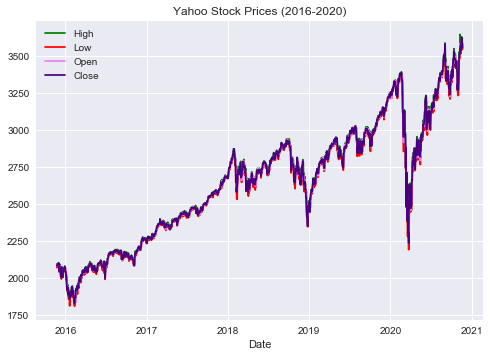

In [9]:
cols = ['High', 'Low', 'Open', 'Close']
color = ['g','r','violet','indigo']
i = 0
for column in cols:
    plt.plot(yahoo.index.to_pydatetime(), yahoo[column], color=color[i], label=column)
    i+=1
    plt.xlabel('Date')
    plt.legend()
    plt.title('Yahoo Stock Prices (2016-2020)')

In [10]:
#Smoothing out data based on average of 50 datapoints for easier visualization of trends
yahoo_smooth = yahoo.rolling(window=50).mean()

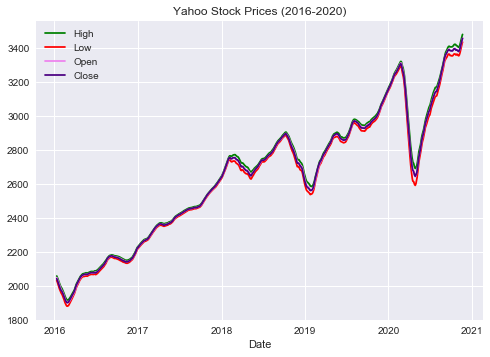

In [11]:
cols = ['High', 'Low', 'Open', 'Close']
color = ['g','r','violet','indigo']
i = 0
for column in cols:
    plt.plot(yahoo_smooth.index.to_pydatetime(), yahoo_smooth[column], color=color[i], label=column)
    i+=1
    plt.xlabel('Date')
    plt.legend()
    plt.title('Yahoo Stock Prices (2016-2020)')

##### There was a sharp decline in stock prices in 2020. So, let us zoom into 2020 data to identify exactly when did the decline started.

In [12]:
yahoo_2020 = yahoo.loc['2020-01-01':'2020-12-31']

In [13]:
yahoo_2020_smooth = yahoo_2020.rolling(window=30).mean()

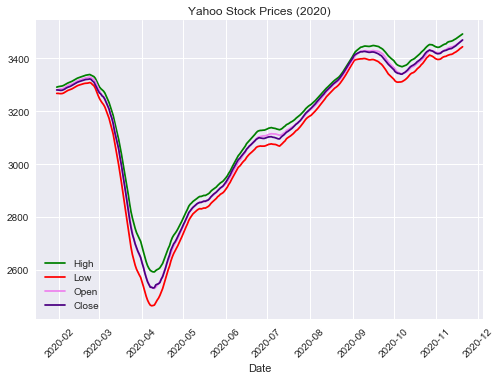

In [14]:
cols = ['High', 'Low', 'Open', 'Close']
color = ['g','r','violet','indigo']
i = 0
for column in cols:
    plt.plot(yahoo_2020_smooth.index.to_pydatetime(), yahoo_2020_smooth[column], color=color[i], label=column)
    i+=1
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.legend()
    plt.title('Yahoo Stock Prices (2020)')

##### The decline started in March 2020 and the prices started to improve by mid April and recovered by September 2020. The most probable reason for this incident seems to be the COVID-19 pandemic.

In [15]:
yahoo_adj_close_monthly_avg = yahoo['Adj Close'].resample('MS').mean()

In [16]:
yahoo_adj_close_monthly_avg[:5]

Date
2015-11-01    2088.026306
2015-12-01    2051.352913
2016-01-01    1927.887408
2016-02-01    1902.567938
2016-03-01    2023.688059
Freq: MS, Name: Adj Close, dtype: float64

In [17]:
type(yahoo_adj_close_monthly_avg)

pandas.core.series.Series

Text(0.5,1,'Yahoo Stock Prices Monthly Average')

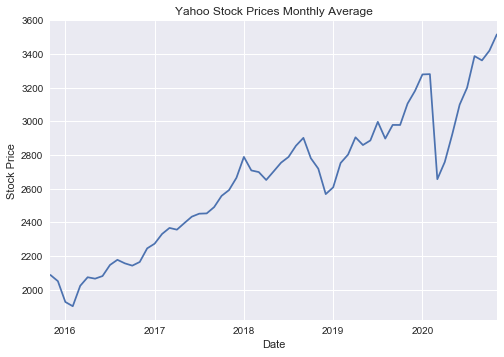

In [18]:
yahoo_adj_close_monthly_avg.plot()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Yahoo Stock Prices Monthly Average')

In [19]:
# Check seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

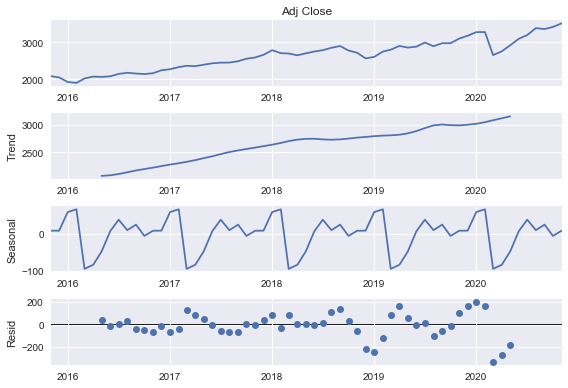

In [20]:
S = seasonal_decompose(yahoo_adj_close_monthly_avg,model='add')
S.plot()
plt.show()

### Test for Stationarity

In [21]:
# Check if the data is stationary using the Augmented Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

In [22]:
def adfuller_test(column):
    result = adfuller(column)
    labels = ['ADF Test Statistic','p-value','#Lags used','Number of observations']
    for value,label in zip(result,labels):
        print(label+' :'+str(value))
    print('Critical Values:')
    for key,value in result[4].items():
        print(key+' : '+str(round(value,6)))
    print('')
    if result[1] <= 0.05:
        print('We reject the null hypothesis(H0). Data does not have unit root indicating it is stationary.')
    else:
        print('We fail to reject the null hypothesis(H0). Data has unit root indicating it is non-stationary.')

In [23]:
adfuller_test(yahoo_adj_close_monthly_avg)

ADF Test Statistic :-0.39737744106170475
p-value :0.9105357307992306
#Lags used :0
Number of observations :60
Critical Values:
1% : -3.544369
5% : -2.911073
10% : -2.59319

We fail to reject the null hypothesis(H0). Data has unit root indicating it is non-stationary.


### Differencing

In [24]:
yahoo_monthly_first_diff = yahoo_adj_close_monthly_avg - yahoo_adj_close_monthly_avg.shift(1)

In [25]:
yahoo_monthly_first_diff[:5]

Date
2015-11-01           NaN
2015-12-01    -36.673393
2016-01-01   -123.465505
2016-02-01    -25.319469
2016-03-01    121.120121
Freq: MS, Name: Adj Close, dtype: float64

In [26]:
adfuller_test(yahoo_monthly_first_diff.dropna())

ADF Test Statistic :-7.144445169403606
p-value :3.260228828249852e-10
#Lags used :0
Number of observations :59
Critical Values:
1% : -3.546395
5% : -2.911939
10% : -2.593652

We reject the null hypothesis(H0). Data does not have unit root indicating it is stationary.


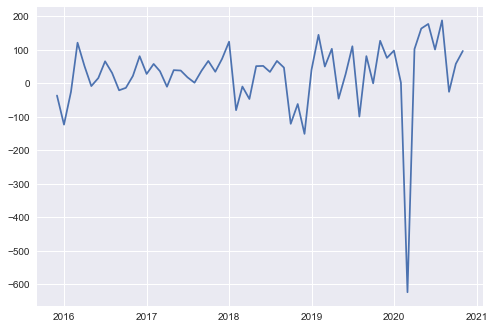

In [27]:
plt.plot(yahoo_monthly_first_diff.dropna())

In [28]:
yahoo_monthly_seasonal_first_diff = yahoo_monthly_first_diff - yahoo_monthly_first_diff.shift(12)

In [29]:
yahoo_monthly_seasonal_first_diff[:19]

Date
2015-11-01           NaN
2015-12-01           NaN
2016-01-01           NaN
2016-02-01           NaN
2016-03-01           NaN
2016-04-01           NaN
2016-05-01           NaN
2016-06-01           NaN
2016-07-01           NaN
2016-08-01           NaN
2016-09-01           NaN
2016-10-01           NaN
2016-11-01           NaN
2016-12-01    117.448396
2017-01-01    151.250961
2017-02-01     83.006618
2017-03-01    -85.163691
2017-04-01    -61.184976
2017-05-01     47.612355
Freq: MS, Name: Adj Close, dtype: float64

In [30]:
adfuller_test(yahoo_monthly_seasonal_first_diff.dropna())

ADF Test Statistic :-5.039525685203808
p-value :1.8524375085232057e-05
#Lags used :4
Number of observations :43
Critical Values:
1% : -3.592504
5% : -2.93155
10% : -2.604066

We reject the null hypothesis(H0). Data does not have unit root indicating it is stationary.


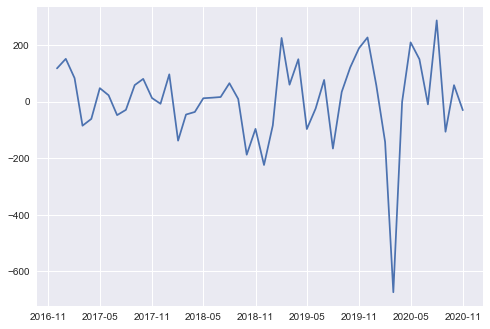

In [31]:
plt.plot(yahoo_monthly_seasonal_first_diff.dropna())

### Auto-Correlation and Partial Auto-Correlation

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

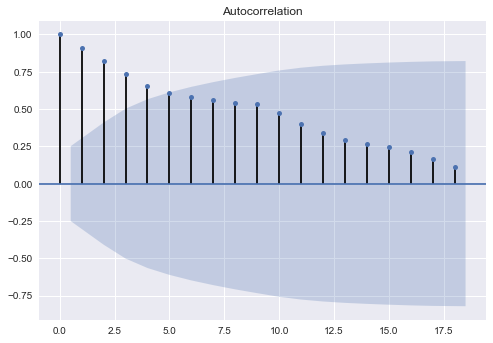

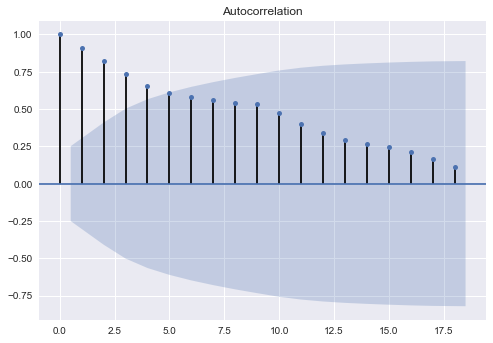

In [33]:
plot_acf(yahoo_adj_close_monthly_avg)

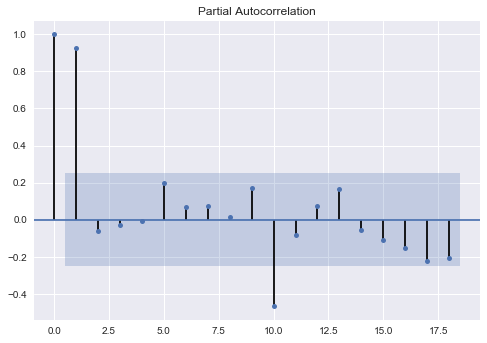

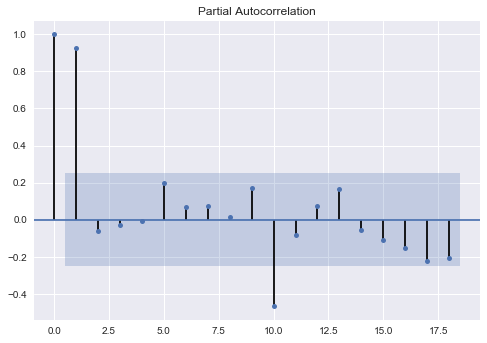

In [34]:
plot_pacf(yahoo_adj_close_monthly_avg)

### ARIMA

In [35]:
# Autoregressive Integrated Moving Averages
# Autoregressive component (p) from PACF plot = 1
# Integrated or Differencing component (d) = 1
# Moving Average part (q) from ACF plot = 4

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [37]:
# Splitting data for training and testing
y = yahoo_adj_close_monthly_avg
train = y[:50]
test = y[50:]

In [38]:
train.head()

Date
2015-11-01    2088.026306
2015-12-01    2051.352913
2016-01-01    1927.887408
2016-02-01    1902.567938
2016-03-01    2023.688059
Freq: MS, Name: Adj Close, dtype: float64

In [39]:
test.head()

Date
2020-01-01    3279.136798
2020-02-01    3280.883764
2020-03-01    2656.981934
2020-04-01    2759.027995
2020-05-01    2922.437405
Freq: MS, Name: Adj Close, dtype: float64

In [40]:
model_fit = ARIMA(train, order=(1,1,4)).fit()

C:\Users\adity\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                   49
Model:                 ARIMA(1, 1, 4)   Log Likelihood                -267.766
Method:                       css-mle   S.D. of innovations             54.940
Date:                Mon, 21 Dec 2020   AIC                            549.531
Time:                        01:15:24   BIC                            562.774
Sample:                    12-01-2015   HQIC                           554.555
                         - 12-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                22.5741      1.529     14.761      0.000      19.577      25.572
ar.L1.D.Adj Close    -0.4640      0.222     -2.093      0.036      -0.898      -0.030
ma.L1.D.Adj Close     0.4749      0.192      2.475      0.013       0.099       0.851
ma.L2.D.Adj Close    -0.1584      0.147     -1.077      0.281      -0.446       0.130
ma.L3.D.Adj Close    -0.6915      0.134     -5.164      0.000      -0.954      -0.429
ma.L4.D.Adj Close    -0.6250      0.141     -4.448      0.000      -0.900      -0.350
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1553           +0.0000j            2.1553            0.5000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.4315           -1.0491j            1.1343           -0.3121
MA.3           -0.4315           +1.0491j            1.1343            0.3121
MA.4           -1.2434           -0.0000j            1.2434           -0.5000
-----------------------------------------------------------------------------
"""

In [42]:
forecast = model_fit.forecast(steps=11)[0]

In [43]:
forecast[:5]

array([3157.21720807, 3163.22626965, 3146.99776011, 3174.94967147,
       3195.02865794])

In [44]:
# Calculation for RMSE of predictions
from sklearn.metrics import mean_squared_error

In [45]:
mse = mean_squared_error(test, forecast)
print('MSE: '+str(mse))
rmse = np.sqrt(mse)
print('RMSE: '+str(rmse))

MSE: 54560.73861259532
RMSE: 233.58240218945286


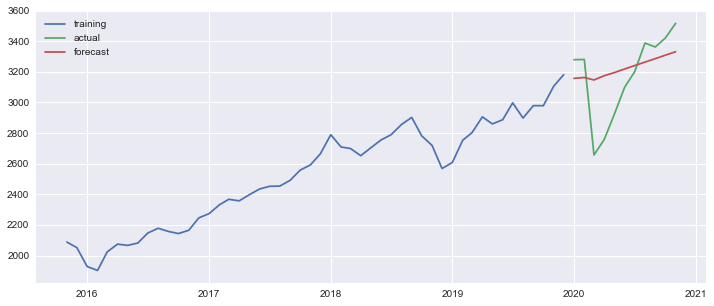

In [46]:
plt.figure(figsize=(12,5))
plt.plot(train.index.to_pydatetime(), train, label='training')
plt.plot(test.index.to_pydatetime(), test, label='actual')
plt.plot(test.index.to_pydatetime(), forecast, label='forecast')
plt.legend()

### SARIMA

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
S_model = SARIMAX(train, order=(1,1,4), seasonal_order=(0,1,2,12))
S_model_fit = S_model.fit()

C:\Users\adity\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\adity\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [49]:
S_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                               Adj Close   No. Observations:                   50
Model:             SARIMAX(1, 1, 4)x(0, 1, [1, 2], 12)   Log Likelihood                -213.563
Date:                                 Mon, 21 Dec 2020   AIC                            443.126
Time:                                         01:15:26   BIC                            456.013
Sample:                                     11-01-2015   HQIC                           447.669
                                          - 12-01-2019                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4683      0.377     -1.242      0.214      -1.207       0.271
ma.L1          0.6112      0.432      1.415      0.157      -0.235       1.458
ma.L2         -0.0246      0.322     -0.076      0.939      -0.655       0.606
ma.L3         -0.5944      0.250     -2.382      0.017      -1.084      -0.105
ma.L4         -0.6456      0.259     -2.495      0.013      -1.153      -0.138
ma.S.L12      -1.0202      3.211     -0.318      0.751      -7.313       5.273
ma.S.L24       0.1552      0.601      0.258      0.796      -1.023       1.333
sigma2      3613.5784   1.19e+04      0.303      0.762   -1.98e+04     2.7e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.77
Prob(Q):                              0.79   Prob(JB):                         0.09
Heteroskedasticity (H):               1.81   Skew:                            -0.77
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
forecast = S_model_fit.forecast(steps=11)

In [51]:
forecast[:5]

2020-01-01    3170.246603
2020-02-01    3152.863382
2020-03-01    3153.169984
2020-04-01    3173.172743
2020-05-01    3188.134524
Freq: MS, Name: predicted_mean, dtype: float64

In [52]:
mse = mean_squared_error(test, forecast)
print('MSE: '+str(mse))
rmse = np.sqrt(mse)
print('RMSE: '+str(rmse))

MSE: 54061.24319311478
RMSE: 232.5107378017514


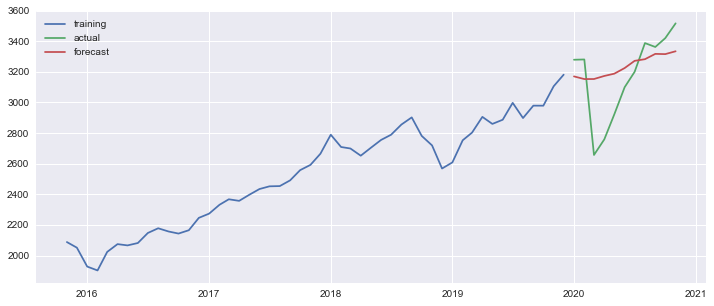

In [53]:
plt.figure(figsize=(12,5))
plt.plot(train.index.to_pydatetime(), train, label='training')
plt.plot(test.index.to_pydatetime(), test, label='actual')
plt.plot(test.index.to_pydatetime(), forecast, label='forecast')
plt.legend()

In [54]:
# RMSE of SARIMA model is less than ARIMA model, so we will proceed with SARIMA

In [55]:
S_model_final = SARIMAX(y, order=(1,1,4), seasonal_order=(0,1,2,12))
S_model_final_fit = S_model_final.fit()

C:\Users\adity\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\adity\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\adity\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [56]:
S_model_final_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                               Adj Close   No. Observations:                   61
Model:             SARIMAX(1, 1, 4)x(0, 1, [1, 2], 12)   Log Likelihood                -299.557
Date:                                 Mon, 21 Dec 2020   AIC                            615.114
Time:                                         01:15:28   BIC                            630.084
Sample:                                     11-01-2015   HQIC                           620.771
                                          - 11-01-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1817      0.978      0.186      0.853      -1.734       2.098
ma.L1         -0.3454     27.310     -0.013      0.990     -53.873      53.182
ma.L2         -0.2308     18.116     -0.013      0.990     -35.737      35.275
ma.L3         -0.2445     11.720     -0.021      0.983     -23.216      22.727
ma.L4         -0.1789      5.011     -0.036      0.972     -10.001       9.643
ma.S.L12      -0.4933      0.354     -1.393      0.164      -1.187       0.201
ma.S.L24       0.2030      0.620      0.327      0.743      -1.013       1.419
sigma2      1.377e+04   3.77e+05      0.036      0.971   -7.26e+05    7.53e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               236.63
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               5.64   Skew:                            -2.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

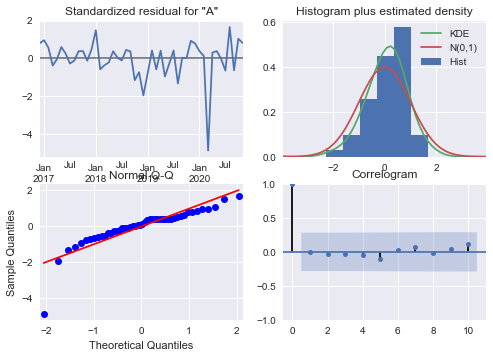

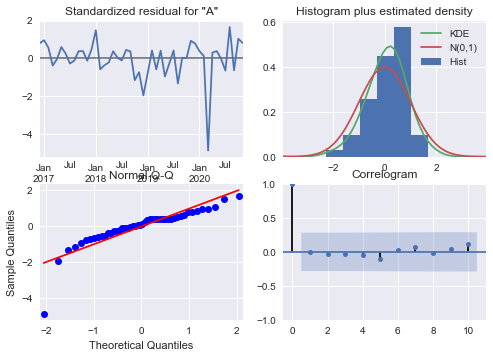

In [57]:
S_model_final_fit.plot_diagnostics()

In [58]:
forecast_2yr = S_model_final_fit.get_prediction(start=pd.to_datetime('2020-12-01'),end=pd.to_datetime('2022-12-01'), 
                                                dynamic=False)

In [59]:
pred_ci = forecast_2yr.conf_int()

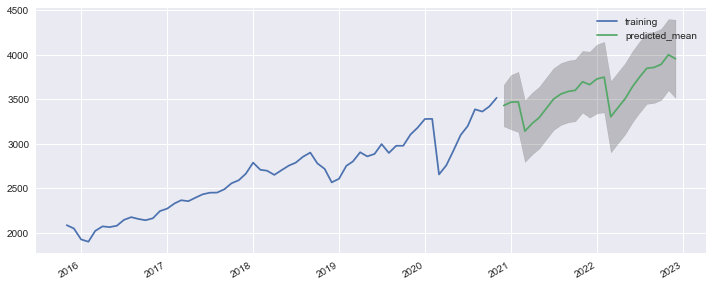

In [60]:
plt.figure(figsize=(12,5))
plt.plot(y.index.to_pydatetime(), y, label='training')
forecast_2yr.predicted_mean.plot()
plt.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()